In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import os

## Plan  
- Divide each image into 9 equal chunks
- Compute the average of R, G and B for each chunk
- This gives 27 variables
- Fit some sort of model to these (nearest neighbours?)

In [2]:
#Read an example image and convert to RGB for matplotlib
img=cv2.imread("data/ad.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
codes=pd.read_csv("data/wikipedia-iso-country-codes.csv")

In [41]:
df = pd.DataFrame(index=np.arange(0, 5), columns=('lib', 'qty1', 'qty2') )

# now fill it up row by row
for x in np.arange(0, 5):
    #loc or iloc both work here since the index is natural numbers
    df.loc[x] = [np.random.randint(-1,1) for n in range(3)]



In [5]:
#Check dimensions
img.shape

(385, 550, 3)

In [52]:
out=pd.DataFrame(index=np.arange(0, 5), columns=('lib', 'qty1', 'qty2','qty3','qty4') )
#out.append(pd.DataFrame(x))

out.loc[0]=[x]
out

,lib,qty1,qty2,qty3,qty4
0,"[56, 0, 150, 134, 90, 99, 252, 224, 22, 230, 1...","[56, 0, 150, 134, 90, 99, 252, 224, 22, 230, 1...","[56, 0, 150, 134, 90, 99, 252, 224, 22, 230, 1...","[56, 0, 150, 134, 90, 99, 252, 224, 22, 230, 1...","[56, 0, 150, 134, 90, 99, 252, 224, 22, 230, 1..."
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [65]:
out=pd.DataFrame()
out=out.append(pd.Series(x), ignore_index=True)
out

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,56.0,0.0,150.0,134.0,90.0,99.0,252.0,224.0,22.0,230.0,...,99.0,252.0,224.0,22.0,230.0,106.0,47.0,216.0,28.0,63.0


In [64]:
x?

In [ ]:
rows_list = []
for row in input_rows:

        dict1 = {}
        # get input row in dictionary format
        # key = col_name
        dict1.update(blah..) 

        rows_list.append(dict1)

df = pd.DataFrame(rows_list) 

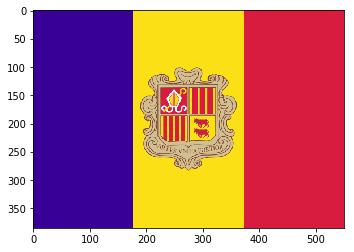

In [4]:
#Show the image
plt.imshow(img)

(<matplotlib.axes._subplots.AxesSubplot at 0x1ff39162320>,
 <matplotlib.image.AxesImage at 0x1ff3c2b90b8>)

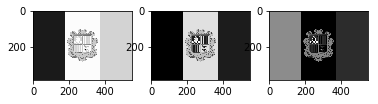

In [5]:
#Visualise the three different layers
plt.subplot(131),plt.imshow(img[:,:,0],cmap='gray')
plt.subplot(132),plt.imshow(img[:,:,1],cmap='gray')
plt.subplot(133),plt.imshow(img[:,:,2],cmap='gray')

In [7]:
dim = (5, 5)
img_small = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)

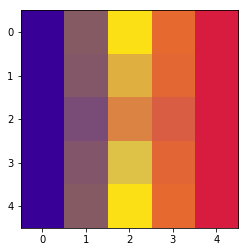

In [8]:
plt.imshow(img_small)

In [9]:
print(img_small)

[[[ 56   0 150]
  [134  90  99]
  [252 224  22]
  [230 106  47]
  [216  28  63]]

 [[ 56   0 150]
  [131  86 104]
  [223 175  64]
  [227 103  51]
  [216  28  63]]

 [[ 56   0 150]
  [121  76 119]
  [219 131  67]
  [217  93  67]
  [216  28  63]]

 [[ 56   0 150]
  [130  85 106]
  [222 194  71]
  [226 102  53]
  [216  28  63]]

 [[ 56   0 150]
  [134  90  99]
  [252 224  22]
  [230 106  47]
  [216  28  63]]]


array([[ 56,   0, 150, 134,  90,  99, 252, 224,  22, 230, 106,  47, 216,
         28,  63,  56,   0, 150, 131,  86, 104, 223, 175,  64, 227, 103,
         51, 216,  28,  63,  56,   0, 150, 121,  76, 119, 219, 131,  67,
        217,  93,  67, 216,  28,  63,  56,   0, 150, 130,  85, 106, 222,
        194,  71, 226, 102,  53, 216,  28,  63,  56,   0, 150, 134,  90,
         99, 252, 224,  22, 230, 106,  47, 216,  28,  63]], dtype=uint8)

In [50]:
#This is my training vector
x=img_small.flatten()
x

array([ 56,   0, 150, 134,  90,  99, 252, 224,  22, 230, 106,  47, 216,
        28,  63,  56,   0, 150, 131,  86, 104, 223, 175,  64, 227, 103,
        51, 216,  28,  63,  56,   0, 150, 121,  76, 119, 219, 131,  67,
       217,  93,  67, 216,  28,  63,  56,   0, 150, 130,  85, 106, 222,
       194,  71, 226, 102,  53, 216,  28,  63,  56,   0, 150, 134,  90,
        99, 252, 224,  22, 230, 106,  47, 216,  28,  63], dtype=uint8)

In [104]:
 edges = cv2.Canny(img,100,200)

(Text(0.5, 1.0, 'Edge Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

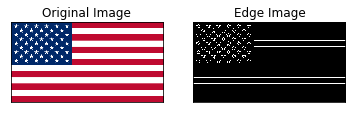

In [105]:
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

In [108]:
import os
directory = 'data/train'
out=pd.DataFrame()
i=0
for filename in os.listdir(directory):
    if filename.endswith(".png"):
        img=cv2.imread(directory + '/' + filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        dim = (5, 5)
        img_small = cv2.resize(img,dim,interpolation = cv2.INTER_AREA)
        #x=img_small.flatten()
        x=pd.Series(img_small.flatten())
        x.name=filename[0:2]
        out=out.append(x)
    else:
        continue

In [109]:
out

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
ad,56.0,0.0,150.0,134.0,90.0,99.0,252.0,224.0,22.0,230.0,...,99.0,252.0,224.0,22.0,230.0,106.0,47.0,216.0,28.0,63.0
ae,206.0,17.0,38.0,51.0,120.0,9.0,0.0,154.0,0.0,0.0,...,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
af,0.0,0.0,0.0,64.0,0.0,0.0,191.0,0.0,0.0,63.0,...,0.0,191.0,0.0,0.0,63.0,102.0,0.0,0.0,153.0,0.0
ag,52.0,4.0,10.0,3.0,2.0,0.0,39.0,32.0,3.0,3.0,...,38.0,231.0,136.0,147.0,206.0,17.0,38.0,206.0,17.0,38.0
al,206.0,17.0,38.0,206.0,17.0,38.0,204.0,17.0,38.0,206.0,...,38.0,206.0,17.0,38.0,206.0,17.0,38.0,206.0,17.0,38.0
am,255.0,0.0,0.0,255.0,0.0,0.0,255.0,0.0,0.0,255.0,...,0.0,255.0,153.0,0.0,255.0,153.0,0.0,255.0,153.0,0.0
ao,206.0,17.0,38.0,206.0,17.0,38.0,206.0,17.0,38.0,206.0,...,0.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0
ar,117.0,170.0,219.0,117.0,170.0,219.0,117.0,170.0,219.0,117.0,...,219.0,117.0,170.0,219.0,117.0,170.0,219.0,117.0,170.0,219.0
at,216.0,30.0,5.0,216.0,30.0,5.0,216.0,30.0,5.0,216.0,...,5.0,216.0,30.0,5.0,216.0,30.0,5.0,216.0,30.0,5.0
au,150.0,115.0,172.0,179.0,95.0,136.0,83.0,63.0,157.0,19.0,...,147.0,0.0,0.0,139.0,20.0,20.0,148.0,0.0,0.0,139.0


In [110]:
out.to_csv('out.csv')